## 1. Import required packages and waterway network under study

In [16]:
import networkx as nx
import pandas as pd
import pickle
G = pickle.load( open('data/network_digital_twin_v0.3.pickle','rb'))
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'],G.nodes[node]['Y'])

## 2. Define sub-modelling problem
Harbours (where a charging station may be place) are almost never directly passed by ships on ongoing routes.
Hence the following questions where raised:
- Which locations may be considered to place charging stations ?
- How to know when a potential location is passed (because not directly on route) ?

The overall goal is thus to create a initial list with nodes, on ongoing routes that lead to harbours. This list may be changed based
on new insights later on. Using this list is a simplification of the problem, ideally the time and distance to travel in and out of a
harbour should also be considered.

## 3. Approach
First branch point towards a port is taken as the entrance to a port. The port itself thus may still be a few nodes further inside
(see picture below). This seems a reasonable assumption, as a harbour also often has more than one dock (also see picture below).


![Tilburg](Tilburg.PNG)

Note that in the picture below, node 8861748 is thus considered to place a charging station, instead of node 8862372.
In essence this won't make much of a difference, as the inland node is always quite near, and the distance is not very significant.

All links that go towards a harbour, have a specific name tag: 'Vaarwegvak van 0 tot 0 - H'
The first (most inland) node of a port is usually connected to a ongoing route, the others are not connected to such a node.
These nodes, can thus be recognised by this tag in combination of a degree higher than or equal to three.
Hence, all nodes are dropped if they have a degree smaller than 3 (see code below).

### Process that resulted in the current pickled list with harbour nodes:

In [2]:
#Get data from df
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [3]:
df_links

,source,target,Id_navigability,GeneralDepth,SeaFairingLength,PushedLength,SeaFairingWidth,Name,PushedWidth,CoupledLength,...,Classification,subgraph,SeaFairingHeight,Wkt,length_m,geometry,SeaFairingDepth,Description,GeneralLength,GeoType
0,8861095,8864054,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 2 - H,NaN,NaN,...,NaN,0,NaN,"LINESTRING (3.54535894046351 51.727661900382, ...",2835.225880,"{'type': 'LineString', 'coordinates': ((3.5453...",NaN,NaN,NaN,section
1,8861095,8865831,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 8 - H,NaN,NaN,...,NaN,0,NaN,"LINESTRING (3.55115167206733 51.6610201943067,...",9673.951122,"{'type': 'LineString', 'coordinates': ((3.5511...",NaN,NaN,NaN,section
2,8864054,8862449,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 2 tot 26 - H,NaN,NaN,...,NaN,0,NaN,"LINESTRING (3.56379034355024 51.7453141508194,...",34409.931001,"{'type': 'LineString', 'coordinates': ((3.5637...",NaN,NaN,NaN,section
3,8867414,8865307,15948.0,4.0,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (4.95297433281719 52.3765489377136,...",271.818288,"{'type': 'LineString', 'coordinates': ((4.9529...",NaN,Vierbaksduwstel,200.0,section
4,8867414,8864869,54860.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (4.95297433281719 52.3765489377136,...",468.352421,"{'type': 'LineString', 'coordinates': ((4.9529...",NaN,"Groot Rijnschip, Eenbaksduwstel",NaN,section
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16159,Berth300,Berth301,25495701.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 1 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (5.225147377319951 51.8166404917617...,155.974627,"{'type': 'LineString', 'coordinates': ((5.2251...",NaN,NaN,NaN,section
16160,Berth301,Berth302,25495701.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 1 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (5.223775719463117 51.8163127103276...,153.638585,"{'type': 'LineString', 'coordinates': ((5.2237...",NaN,NaN,NaN,section
16161,Berth302,Berth303,25495701.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 1 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (5.222424605114935 51.8159898381213...,152.821400,"{'type': 'LineString', 'coordinates': ((5.2224...",NaN,NaN,NaN,section
16162,Berth303,8865499,25495701.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 1 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (5.22108067727965 51.81566868325686...,234.095871,"{'type': 'LineString', 'coordinates': ((5.2210...",NaN,NaN,NaN,section


In [4]:
df_nodes

,n,X,Y,geometry,Wkt
8861095,8861095,3.545359,51.727662,"{'type': 'Point', 'coordinates': (3.5453589404...",POINT (3.5453589404635100 51.7276619003820031)
8864054,8864054,3.563790,51.745314,"{'type': 'Point', 'coordinates': (3.5637903435...",POINT (3.5637903435502398 51.7453141508193966)
8867414,8867414,4.952974,52.376549,"{'type': 'Point', 'coordinates': (4.9529743328...",POINT (4.9529743328171900 52.3765489377136007)
8865307,8865307,4.954211,52.374431,"{'type': 'Point', 'coordinates': (4.9542113637...",POINT (4.9542113637339202 52.3744310413327980)
8864726,8864726,5.756117,52.573627,"{'type': 'Point', 'coordinates': (5.7561165780...",POINT (5.7561165780084798 52.5736268471534984)
...,...,...,...,...,...
Berth302,Berth302,5.222425,51.815990,"{'type': 'Point', 'coordinates': (5.2224246051...",POINT (5.2224246051149352 51.8159898381213324)
Berth303,Berth303,5.221081,51.815669,"{'type': 'Point', 'coordinates': (5.2210806772...",POINT (5.2210806772796499 51.8156686832568596)
8865499,8865499,5.219022,51.815177,"{'type': 'Point', 'coordinates': (5.2190220131...",POINT (5.2190220131971898 51.8151767297702008)
Berth305,Berth305,4.966948,51.827939,"{'type': 'Point', 'coordinates': (4.9669477560...",POINT (4.9669477560782163 51.8279388662828069)


In [6]:
df_nodes.loc[df_nodes.index=='8862959']

,n,X,Y,geometry,Wkt
8862959,8862959,4.63152,52.464488,"{'type': 'Point', 'coordinates': (4.6315203938...",POINT (4.6315203938658698 52.4644876366265009)


In [7]:
#visual inspection of the network showed that all harbour related nodes are tagged: ‘Vaarwegvak van 0 tot 0 - H’
#However, these are many nodes, and each harbour often consists of at least a couple.
df_links.loc[(df_links.Name=='Vaarwegvak van 0 tot 0 - H')]

,source,target,Id_navigability,GeneralDepth,SeaFairingLength,PushedLength,SeaFairingWidth,Name,PushedWidth,CoupledLength,...,Classification,subgraph,SeaFairingHeight,Wkt,length_m,geometry,SeaFairingDepth,Description,GeneralLength,GeoType
3,8867414,8865307,15948.0,4.0,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (4.95297433281719 52.3765489377136,...",271.818288,"{'type': 'LineString', 'coordinates': ((4.9529...",NaN,Vierbaksduwstel,200.0,section
4,8867414,8864869,54860.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (4.95297433281719 52.3765489377136,...",468.352421,"{'type': 'LineString', 'coordinates': ((4.9529...",NaN,"Groot Rijnschip, Eenbaksduwstel",NaN,section
5,8867414,Berth82,15948.0,4.0,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (4.9529139455910665 52.377047994384...,55.750050,"{'type': 'LineString', 'coordinates': ((4.9529...",NaN,Vierbaksduwstel,200.0,section
6,8865307,8862258,15948.0,4.0,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (4.95421136373392 52.3744310413328,...",130.292242,"{'type': 'LineString', 'coordinates': ((4.9542...",NaN,Vierbaksduwstel,200.0,section
7,8865307,8868262,13129.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (4.95421136373392 52.3744310413328,...",314.467416,"{'type': 'LineString', 'coordinates': ((4.9542...",NaN,"Groot Rijnschip, Eenbaksduwstel",NaN,section
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16142,Berth254,8865436,15762.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (4.59874889134049 52.47057691179761...,294.531020,"{'type': 'LineString', 'coordinates': ((4.5987...",NaN,Vierbaksduwstel,NaN,section
16145,Berth271,Berth272,25665.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (4.373294956712148 51.6586177906761...,175.550946,"{'type': 'LineString', 'coordinates': ((4.3732...",NaN,"Groot Rijnschip, Eenbaksduwstel",NaN,section
16146,Berth272,8861523,25665.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (4.374726247388514 51.6593020012844...,188.971979,"{'type': 'LineString', 'coordinates': ((4.3747...",NaN,"Groot Rijnschip, Eenbaksduwstel",NaN,section
16149,Berth275,Berth276,44403.0,NaN,115.0,NaN,16.0,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (3.82587959039649 51.3222241757137,...",130.833623,"{'type': 'LineString', 'coordinates': ((3.8258...",NaN,"Groot Rijnschip, Eenbaksduwstel",140.0,section


In [17]:
berth_nodes = df_nodes.loc[df_nodes.n.str.contains('Berth')].index

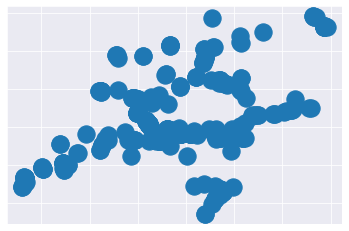

In [20]:
H = G.subgraph(berth_nodes)
nx.draw_networkx_nodes(H, pos_dict)

In [10]:
#There are Berths inside the df that are tagged
df_links.loc[(df_links.target.str.contains('Berth'))]

,source,target,Id_navigability,GeneralDepth,SeaFairingLength,PushedLength,SeaFairingWidth,Name,PushedWidth,CoupledLength,...,Classification,subgraph,SeaFairingHeight,Wkt,length_m,geometry,SeaFairingDepth,Description,GeneralLength,GeoType
5,8867414,Berth82,15948.0,4.0,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (4.9529139455910665 52.377047994384...,55.750050,"{'type': 'LineString', 'coordinates': ((4.9529...",NaN,Vierbaksduwstel,200.0,section
38,8866538,Berth161,25496547.0,NaN,NaN,NaN,NaN,Vaarwegvak van 2 tot 5 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (5.12288056262316 52.3840944110417,...",2054.910084,"{'type': 'LineString', 'coordinates': ((5.1228...",NaN,NaN,NaN,section
118,8867052,Berth255,55411.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (5.142623514620338 52.3228941721060...,49.178202,"{'type': 'LineString', 'coordinates': ((5.1426...",NaN,"Rijn - Hernekanaalschip, Eenbaksduwstel",NaN,section
120,8865642,Berth147,55411.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 5 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (5.1463570868888 52.3209974388549, ...",69.044641,"{'type': 'LineString', 'coordinates': ((5.1463...",NaN,"Rijn - Hernekanaalschip, Eenbaksduwstel",NaN,section
150,8867022,Berth148,55411.0,NaN,NaN,NaN,NaN,Vaarwegvak van 12 tot 14 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (5.316192716521471 52.3030246299058...,3110.945647,"{'type': 'LineString', 'coordinates': ((5.3161...",NaN,"Rijn - Hernekanaalschip, Eenbaksduwstel",NaN,section
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16157,8860956,Berth296,13751.0,3.5,NaN,NaN,NaN,Vaarwegvak van 118 tot 119 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (5.67285428020921 52.8451248895477,...",314.041432,"{'type': 'LineString', 'coordinates': ((5.6728...",NaN,"Groot Rijnschip, Eenbaksduwstel",111.0,section
16158,Berth299,Berth300,25495701.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 1 - H,NaN,NaN,...,CEMT,0,NaN,"LINESTRING (5.22768865656327 51.8168247438901,...",297.039549,"{'type': 'LineString', 'coordinates': ((5.2276...",NaN,NaN,NaN,section
16159,Berth300,Berth301,25495701.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 1 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (5.225147377319951 51.8166404917617...,155.974627,"{'type': 'LineString', 'coordinates': ((5.2251...",NaN,NaN,NaN,section
16160,Berth301,Berth302,25495701.0,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 1 - H,NaN,NaN,...,CEMT,0,NaN,LINESTRING (5.223775719463117 51.8163127103276...,153.638585,"{'type': 'LineString', 'coordinates': ((5.2237...",NaN,NaN,NaN,section


In [5]:
#However,
df_links.loc[(df_links.Name=='Vaarwegvak van 0 tot 0 - H')& (df_links.target.str.contains('Berth'))].dropna(how='all')
# results in only 15 rows, for 47 Berths, doesn't work too well...
# Sometimes multiple links to final harbour node...
# What if Vaarwegvak van 0 tot 0 - H, with at least degree of 3 of source node?

,source,target,lat_p50,Code,nap_p10,nap_p5,CoupledDepth,Id_navigability,lat_p0,Length,...,GeneralWidth,PushedWidth,WidePushedLength,lat_mean,SeaFairingHeight,GeneralLength,Name,WidePushedWidth,PushedDepth,CoupledWidth
283,8862842,Berth40,NaN,V_A,-5.803653,-5.848389,NaN,44403.0,NaN,0.595,...,16.0,NaN,NaN,NaN,NaN,140.0,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
1105,28313551,Berth29,NaN,II,-6.774988,-6.791406,NaN,44774.0,NaN,0.890,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
1652,8866129,Berth29,NaN,II,-5.818934,-6.237931,NaN,44774.0,NaN,0.890,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
1927,8861452,Berth20,NaN,VI_C,1.317915,1.293197,NaN,45971.0,NaN,0.349,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
1994,8863471,Berth28,NaN,VI_B,-9.653448,-11.447551,NaN,25495526.0,NaN,0.855,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
3277,8867489,Berth8,NaN,VI_B,-11.952581,-12.268987,NaN,49182.0,NaN,0.402,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
3278,8867489,Berth39,NaN,V_A,-13.795342,-13.860395,NaN,44403.0,NaN,0.595,...,16.0,NaN,NaN,NaN,NaN,140.0,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
5281,B7532_A,Berth28,NaN,VI_B,-2.030411,-2.143528,NaN,25495526.0,NaN,0.855,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
14464,22638160,Berth48,NaN,II,-4.775776,-4.816955,NaN,25496287.0,NaN,0.221,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
14465,8862253,Berth4,NaN,V_A,-5.600933,-5.654598,NaN,58223.0,NaN,0.297,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN


In [6]:
#first collect degrees
degrees = G.degree

harbour_links = df_links.loc[(df_links.Name=='Vaarwegvak van 0 tot 0 - H')]
harbour_links.reset_index(inplace = True, drop = True)

for index, source in enumerate(harbour_links.source):
    if degrees[source] < 3:
        harbour_links.drop(index, inplace=True)

harbour_links.reset_index(inplace = True, drop = True)

harbour_links
#looks OK for now! Maybe still filter based on depth or something like that later on

C:\Users\Fabia\AppData\Local\Temp\ipykernel_14096\4039122636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harbour_links.drop(index, inplace=True)
C:\Users\Fabia\AppData\Local\Temp\ipykernel_14096\4039122636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harbour_links.drop(index, inplace=True)
C:\Users\Fabia\AppData\Local\Temp\ipykernel_14096\4039122636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harbour_links.drop(i

,source,target,lat_p50,Code,nap_p10,nap_p5,CoupledDepth,Id_navigability,lat_p0,Length,...,GeneralWidth,PushedWidth,WidePushedLength,lat_mean,SeaFairingHeight,GeneralLength,Name,WidePushedWidth,PushedDepth,CoupledWidth
0,8861581,8863189,NaN,_0,NaN,NaN,NaN,25496406.0,NaN,0.371,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
1,8860954,8864050,NaN,VI_C,NaN,NaN,NaN,10916.0,NaN,0.785,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
2,8865802,8862540,NaN,V_A,NaN,NaN,NaN,8090.0,NaN,0.465,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
3,8864595,8864137,NaN,VI_C,NaN,NaN,NaN,42146.0,NaN,0.104,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
4,8864595,8862678,NaN,VI_C,NaN,NaN,NaN,53505.0,NaN,0.628,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,8868094,B51576_A,NaN,II,NaN,NaN,NaN,6367.0,NaN,0.243,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
811,S46058_A,S46058_A,NaN,V_A,2.676762,2.676762,NaN,25487825.0,NaN,0.708,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
812,S46058_A,S46058_B,NaN,V_A,2.713659,2.713659,NaN,25487825.0,NaN,0.708,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
813,22638160,Berth48,NaN,II,-4.775776,-4.816955,NaN,25496287.0,NaN,0.221,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN


In [7]:
print('# harbour links', len(harbour_links))
# number of unique harbour_exits for whole network looks somewhat reasonable

# harbour links 815


In [8]:
#unique sources should be on ongoing routes
harbour_exits = list(harbour_links.source.unique())
print(len(harbour_exits))

649


In [9]:
# pick list to use in program
pickle.dump( harbour_exits, open( "data/harbour_exits.p", "wb" ) )